Attempting to estimate parameters for cable skin effect.  What is the skin depth of manganin wire?

In [1]:
import numpy as np
from scipy import constants
import matplotlib.pylab as plt

def approximate_skin_depth(f,rho,mu_r):
    mu = mu_r*constants.mu_0
    omega=2*np.pi*f
    # approximate skin depth
    delta=np.sqrt((2*rho)/(omega*mu))
    return delta

Matplotlib

In [2]:
%matplotlib inline

In [3]:
# https://www.sciencedirect.com/topics/engineering/manganin#:~:text=Manganin%20(84%25%20Cu%2C%204,10%E2%88%925%2F%C2%B0C.
rho_manganin = 0.4e-6 # Ohm * m
# Magnetization and magnetoresistance of common alloy wires used in cryogenic instrumentation 
# from there, the magnetic susceptibility chi for manganin is (Table 1) between 1.25e-2 at 4K to 2.7e-3 T 295K.
# chi = mu_r-1, so mu_r is ~ 1+(1.25e-2+2.7e-3)/2 ~ 1.0076
mu_r_manganin = 1.0076

In [4]:
f=1e6 # Hz
print(f'Approximate manganin skin depth @ {f/1.e6:0.0f} MHz : {1.e6*approximate_skin_depth(f,rho_manganin,mu_r_manganin):0.0f} um')

Approximate manganin skin depth @ 1 MHz : 317 um


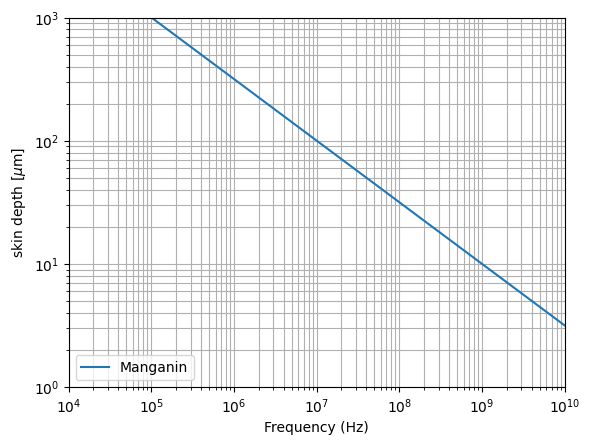

In [5]:
f = np.linspace(1e4,1e10,1000)
plt.loglog(f,1.e6*approximate_skin_depth(f,rho_manganin,mu_r_manganin),label='Manganin')
plt.ylim(1,1000)
plt.xlim(1e4,1e10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('skin depth [$\mu$m]')
plt.legend(loc='lower left')
plt.grid(True, which="both")


Compare to M. Thalmann et al., Comparison of cryogenic low-pass filters (2017);

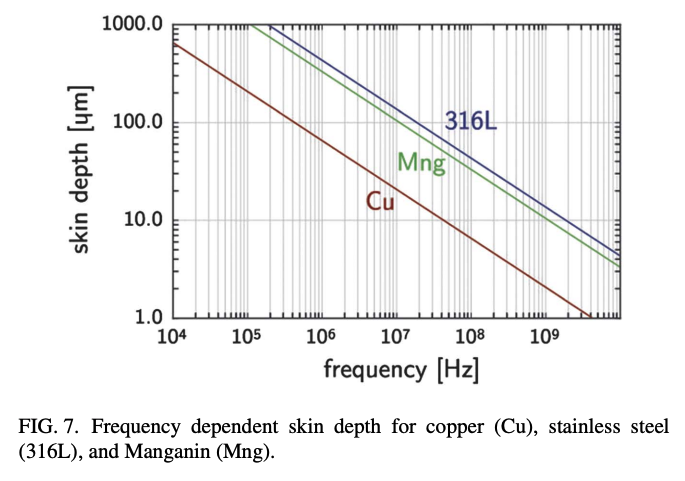

Ok, now let's try to compute alpha_R to use for compact skin effect model, Equation 4 in S. Kim (1996) Compact Equivalent Circuit Model for the Skin Effect; 

In [19]:
fmax=1e9
delta_max = approximate_skin_depth(fmax,rho_manganin,mu_r_manganin)
print(f'delta_max @ {fmax/1e6:0.0f} MHz = {delta_max*1.e6:.1f} um')

delta_max @ 1000 MHz = 10.0 um


Trying to model up to 1 GHz which is far more than we need.  We are using 36 AWG manganin wire.

That's 5 mils diameter, or 127 um.  So 

In [36]:
alpha_R = 0.53*(127/(1.e6*delta_max))
print(f'alpha_R = {alpha_R:0.3f}')

alpha_R = 6.712


According to Kim '96, can then approximate 

In [47]:
alpha_L = 3 #0.315*alpha_R
print(f'alpha_L = {alpha_L:0.3f}')

alpha_L = 3.000


Internal inductance estimate, assuming long wire limit

In [52]:
Lint_per_m = 1.1*2*mu_r_manganin*constants.mu_0/(8*np.pi) # H/m , 2x is because we're going down and back

## Conductor resistivity / conductivity                                         
Rdc_per_m=72.2 # Ohm/m                                                          
## Low frequency conductor inductance                                           
Llf_per_m=711e-9 # Henry/m 

print(f'Lint_per_m = {Lint_per_m*1.e9:.1f} nH/m')
print(f'Llf_per_m = {Llf_per_m*1.e9:.1f} nH/m')
print(f'Rdc_per_m = {Rdc_per_m:.1f} Ohm/m')


Lint_per_m = 110.8 nH/m
Llf_per_m = 711.0 nH/m
Rdc_per_m = 72.2 Ohm/m


python kim96_skineffect.py 6.712333757372532 3.0 1.1083600006033646e-07 7.11e-07 72.2
alpha_R = 6.712
alpha_L = 3.000
Llf_per_m = 711.0 nH/m
Lint_per_m = 110.8 nH/m
Lext_per_m = 600.2 nH/m
Rdc_per_m = 72.2 Ohm/m
--------------------
RR = 1.3586263782619112
LL = 0.3567800847824133
--------------------
R1 = 484.6 Ohm
L1 = 36.9 nH
R2 = 356.7 Ohm
L2 = 103.6 nH
R3 = 262.5 Ohm
L3 = 290.2 nH
R4 = 193.2 Ohm
L4 = 813.5 nH


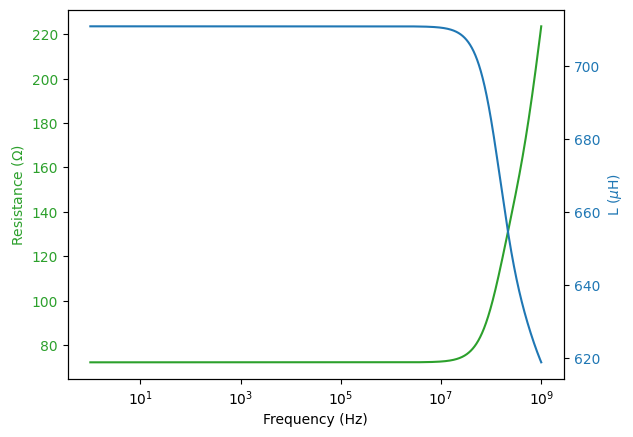

In [53]:
print(f'python kim96_skineffect.py {alpha_R} {alpha_L} {Lint_per_m} {Llf_per_m} {Rdc_per_m}')
%run -i 'kim96_skineffect.py' {alpha_R} {alpha_L} {Lint_per_m} {Llf_per_m} {Rdc_per_m}